# **CLUSTERING ANALYSIS**

## Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

## **Objective:**

The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

## **Datasets :**

In [17]:
# Load the Dataset
file_path = '/content/EastWestAirlines_Data.xlsx'

In [18]:
df = pd.read_excel(file_path)

In [19]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [20]:
# Data Preprocessing
# Handle missing values
df = df.dropna()

In [21]:
# Separate numeric and non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])
non_numeric_df = df.select_dtypes(exclude=[np.number])

In [22]:
# Print numeric columns
print(f"Numeric columns: {numeric_df.columns.tolist()}")

Numeric columns: ['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll', 'Award?']


In [23]:
from scipy.stats import zscore

In [24]:
# Remove outliers using Z-score
numeric_df = numeric_df[(np.abs(zscore(numeric_df)) < 3).all(axis=1)]

In [25]:
# Print the shape after removing outliers
print(f"Shape after removing outliers: {numeric_df.shape}")

Shape after removing outliers: (3630, 12)


In [26]:
# Merge non-numeric columns back if necessary
df = pd.concat([numeric_df, non_numeric_df.loc[numeric_df.index]], axis=1)

In [27]:
# Ensure merged DataFrame is not empty
print(f"Shape after merging non-numeric columns back: {df.shape}")

Shape after merging non-numeric columns back: (3630, 12)


In [28]:
# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_df)

# **Exploratory Data Analysis (EDA)**


In [29]:
# Basic statistics
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.0,3630.0,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,2043.135813,60519.392562,39.584573,1.997245,1.0,1.0,14299.180716,10.464187,255.907438,0.785124,4061.804408,0.340220
std,1156.308525,61882.862343,249.199005,1.319875,0.0,0.0,18134.266531,8.251370,636.954758,1.818614,2052.901389,0.473848
min,1.000000,0.000000,0.000000,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,1054.250000,17481.000000,0.000000,1.000000,1.0,1.0,1000.000000,3.000000,0.000000,0.000000,2284.000000,0.000000
50%,2054.500000,39220.000000,0.000000,1.000000,1.0,1.0,5894.500000,11.000000,0.000000,0.000000,4022.000000,0.000000
75%,3041.750000,82121.500000,0.000000,3.000000,1.0,1.0,21631.250000,16.000000,150.000000,1.000000,5715.750000,1.000000
max,4021.000000,370941.000000,2454.000000,5.000000,1.0,1.0,89360.000000,39.000000,4652.000000,12.000000,8296.000000,1.000000


<Figure size 1000x600 with 0 Axes>

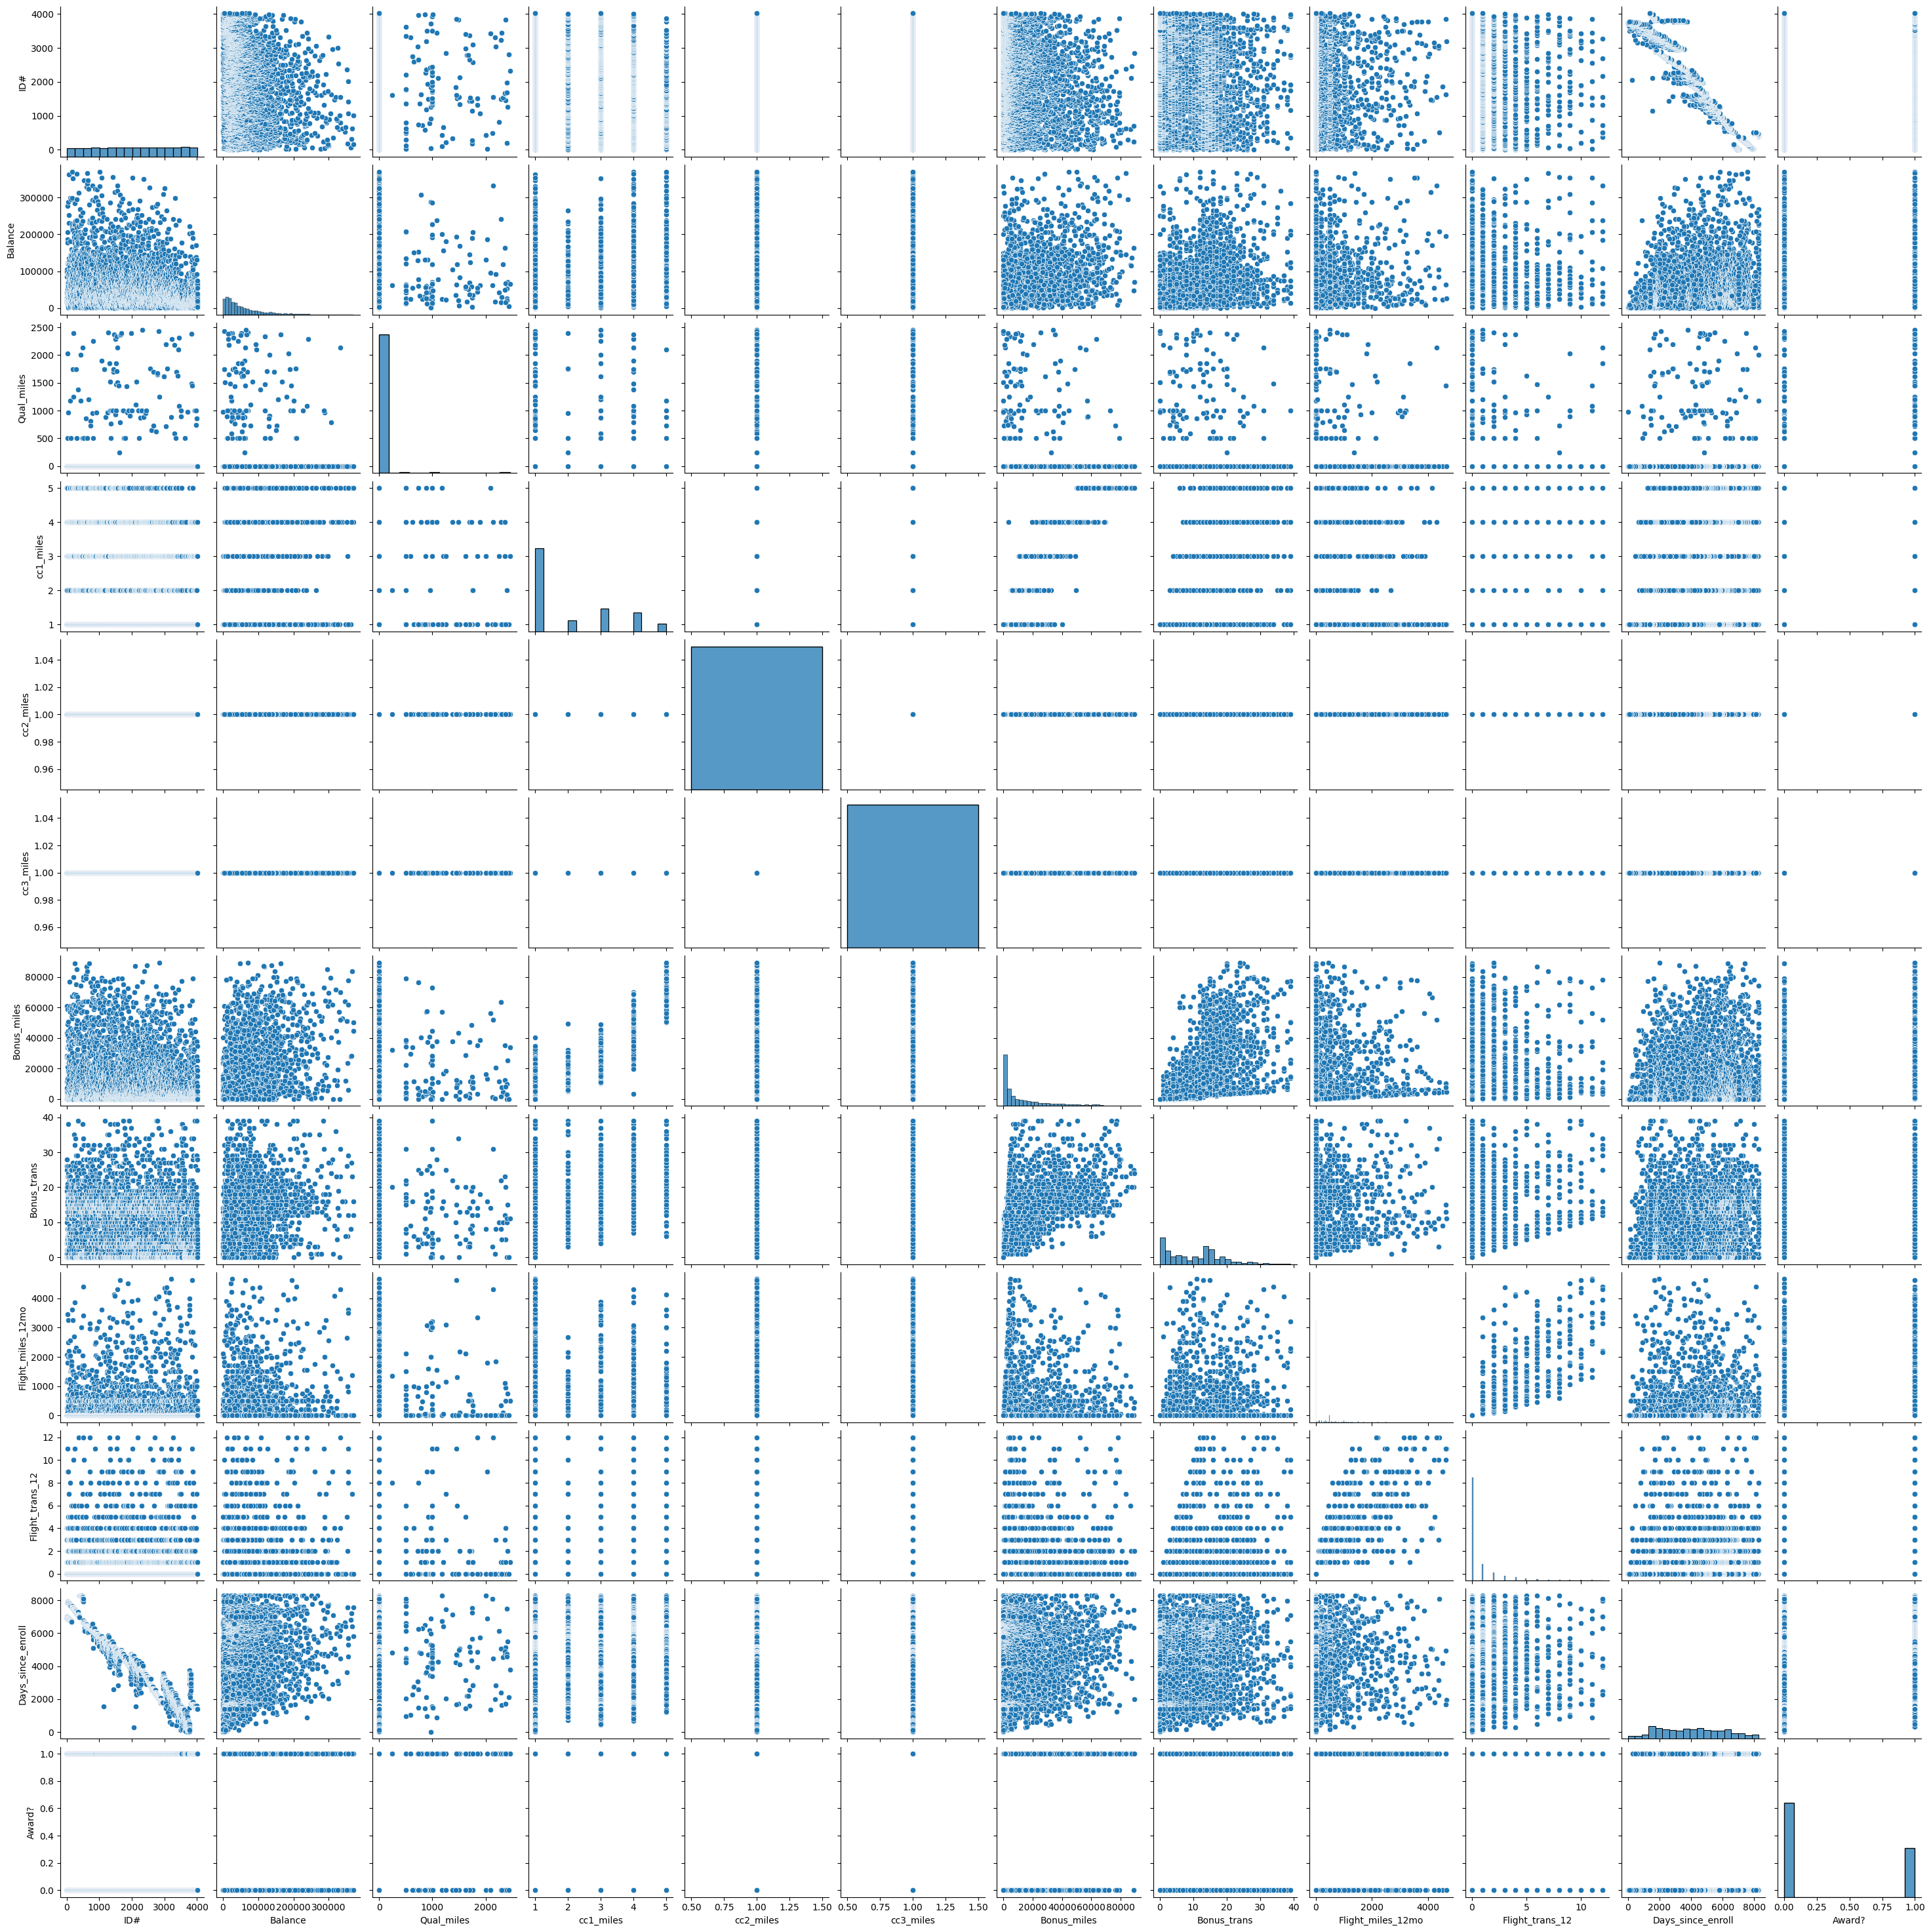

In [30]:
# Visualizations
plt.figure(figsize=(10, 6))
sns.pairplot(df)
plt.show()

# **Implement K-Means Clustering**

In [31]:
# Determine the optimal number of clusters using the Elbow method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

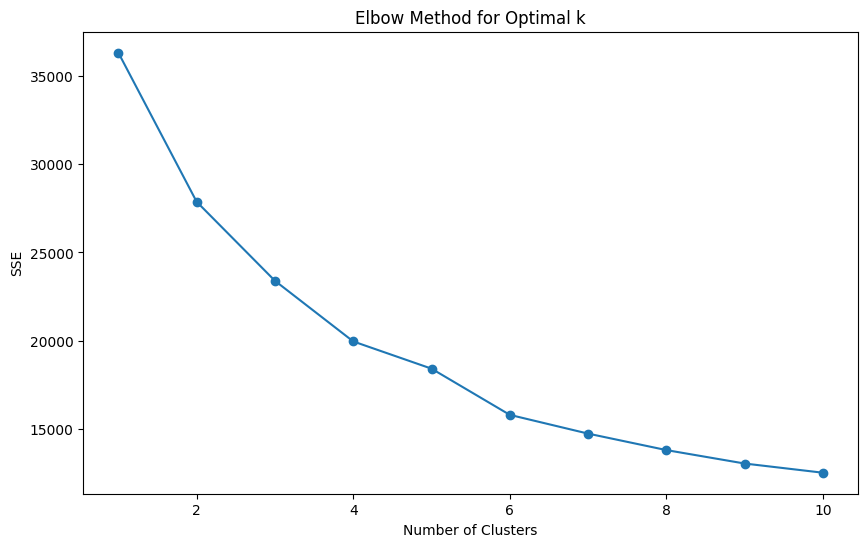

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

In [33]:
# Apply K-Means with optimal k
optimal_k = 3  # Assume 3 from Elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

# **Hierarchical Clustering**

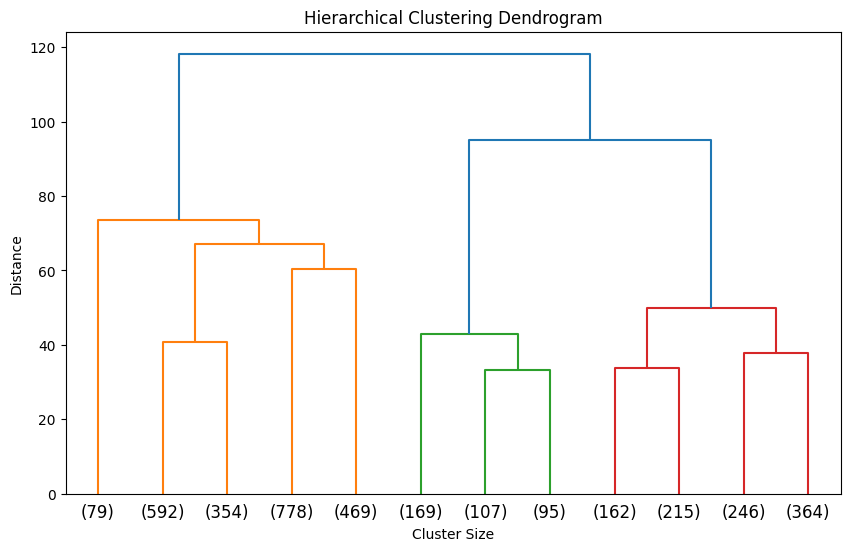

In [34]:
linked = linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [36]:
# Assign clusters
hierarchical_labels = fcluster(linked, t=3, criterion='maxclust')

# **DBSCAN Clustering**

In [37]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

# **Cluster Analysis and Interpretation**

In [38]:
df['KMeans_Cluster'] = kmeans_labels
df['Hierarchical_Cluster'] = hierarchical_labels
df['DBSCAN_Cluster'] = dbscan_labels

In [39]:
# Analyzing cluster characteristics
kmeans_clusters = df.groupby('KMeans_Cluster').mean()
hierarchical_clusters = df.groupby('Hierarchical_Cluster').mean()
dbscan_clusters = df.groupby('DBSCAN_Cluster').mean()

In [40]:
# Display the cluster analysis results
print("K-Means Clusters:\n", kmeans_clusters)
print("Hierarchical Clusters:\n", hierarchical_clusters)
print("DBSCAN Clusters:\n", dbscan_clusters)

K-Means Clusters:
                         ID#       Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                
0               2331.734973  36542.100638   27.233151   1.186248        1.0   
1               1926.426295  97169.737052  159.533865   2.015936        1.0   
2               1532.172443  97252.187658   37.062553   3.498732        1.0   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                     1.0   3970.405282     6.167122          96.213115   
1                     1.0  19085.649402    15.924303        2186.924303   
2                     1.0  32456.904480    17.282333         142.639053   

                Flight_trans_12  Days_since_enroll    Award?  \
KMeans_Cluster                                                 
0                      0.343807        3529.458561  0.187614   
1                

# **Visualization**

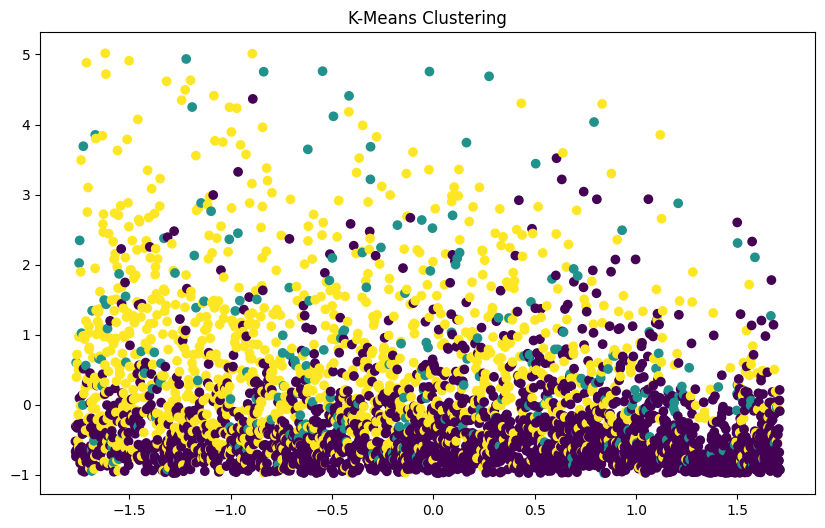

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

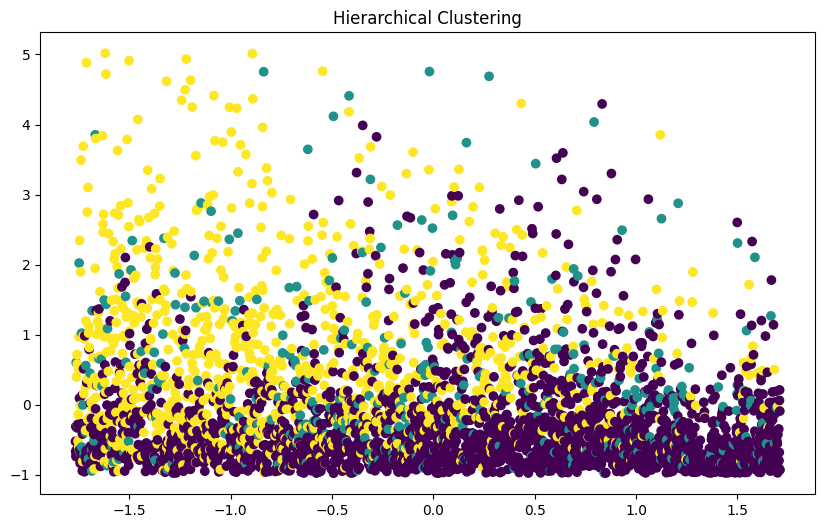

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.show()

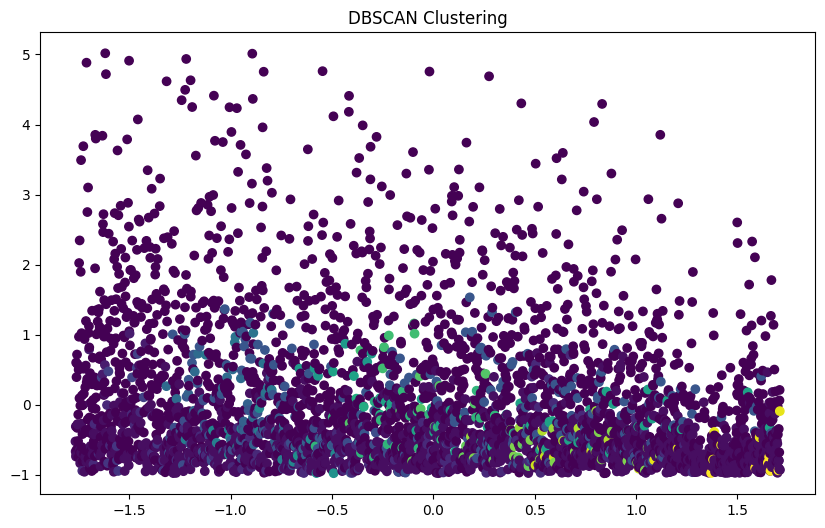

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

# **Evaluation and Performance Metrics**

In [44]:
kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)
hierarchical_silhouette = silhouette_score(df_scaled, hierarchical_labels)
dbscan_silhouette = silhouette_score(df_scaled, dbscan_labels)

In [45]:
print(f'Silhouette Score for K-Means: {kmeans_silhouette}')
print(f'Silhouette Score for Hierarchical Clustering: {hierarchical_silhouette}')
print(f'Silhouette Score for DBSCAN: {dbscan_silhouette}')

Silhouette Score for K-Means: 0.29192710837860614
Silhouette Score for Hierarchical Clustering: 0.26359050526851413
Silhouette Score for DBSCAN: -0.3994552312980999
